# Genre recognition: experiment

Goal: Check the influence of the distance metric (euclidean or cosine).

Conclusion: The cosine metric seems more appropriate.

Observations:
* Higher accuracy with the cosine distance.
* Why are the atoms and the accuracy different from the experiment on $\lambda_d$ ? With the initialized seed the results should really be the same. The baseline is however strictly the same.
* Ran for 2h10.

## Hyper-parameters

### Parameter under test

In [1]:
Pname = 'dm'
Pvalues = ['cosine', 'euclidean']

# Regenerate the graph or the features at each iteration.
regen_graph = True
regen_features = True

### Model parameters

In [2]:
p = {}

# Preprocessing.

# Graph.
p['K'] = 10 + 1  # 5 to 10 + 1 for self-reference
p['dm'] = 'cosine'
p['Csigma'] = 1
p['diag'] = True
p['laplacian'] = 'normalized'

# Feature extraction.
p['m'] = 128  # 64, 128, 512
p['ls'] = 1
p['ld'] = 10
p['le'] = None
p['lg'] = 100

# Classification.
p['scale'] = None
p['Nvectors'] = 6
p['svm_type'] = 'C'
p['kernel'] = 'linear'
p['C'] = 1
p['nu'] = 0.5

### Numerical parameters

In [3]:
# HDF5 data stores.
p['folder'] = 'data'
p['filename_gtzan'] = 'gtzan.hdf5'
p['filename_audio'] = 'audio.hdf5'
p['filename_graph'] = 'graph.hdf5'
p['filename_features'] = 'features.hdf5'

# Dataset (10,100,644 | 5,100,149 | 2,10,644).
p['Ngenres'] = 5
p['Nclips'] = 100
p['Nframes'] = 149

# Graph.
p['tol'] = 1e-5

# Feature extraction.
p['rtol'] = 1e-5  # 1e-3, 1e-5, 1e-7
p['N_inner'] = 500
p['N_outer'] = 50

# Classification.
p['Nfolds'] = 10
p['Ncv'] = 40
p['dataset_classification'] = 'Z'

## Processing

In [4]:
import numpy as np
import time

texperiment = time.time()

# Result dictionary.
res = ['accuracy', 'accuracy_std']
res += ['sparsity', 'atoms']
res += ['objective_g', 'objective_h', 'objective_i', 'objective_j']
res += ['time_features', 'iterations_inner', 'iterations_outer']
res = dict.fromkeys(res)
for key in res.keys():
    res[key] = []

def separator(name, parameter=False):
    if parameter:
        name += ', {} = {}'.format(Pname, p[Pname])
    dashes = 20 * '-'
    print('\n {} {} {} \n'.format(dashes, name, dashes))
    # Fair comparison when tuning parameters.
    # Randomnesses: dictionary initialization, training and testing sets.
    np.random.seed(1)


 -------------------- Graph, dm = cosine -------------------- 

Data: (149000, 96), float32
Elapsed time: 159.32 seconds
All self-referenced in the first column: True
dist in [0.0, 0.550418317318]
w in [0.0235210377723, 1.0]
Ones on the diagonal: 149000 (over 149000)
assert: True
W in [0.0, 1.0]
Datasets:
  L_data    : (2375982,), float32
  L_indices : (2375982,), int32
  L_indptr  : (149001,) , int32
  L_shape   : (2,)      , int64
  W_data    : (2375982,), float32
  W_indices : (2375982,), int32
  W_indptr  : (149001,) , int32
  W_shape   : (2,)      , int64
Attributes:
  K = 11
  dm = cosine
  Csigma = 1
  diag = True
  laplacian = normalized
Overall time: 168.58 seconds

 -------------------- Features, dm = cosine -------------------- 

Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  Xa: (10, 100, 644, 2, 1024) , float32
  Xs: (10, 100, 644, 2, 96)   , float32
Full dataset:
  size: N=1,288,000 x

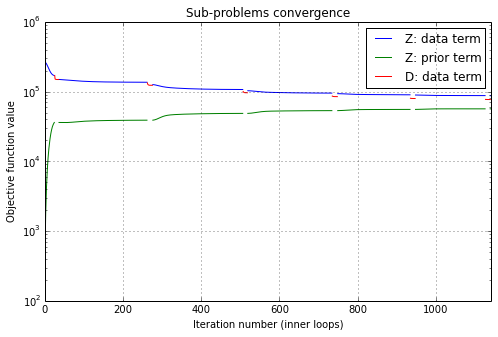

Inner loop: 1143 iterations
g(Z) = ||X-DZ||_2^2 = 7.682912e+04
rdiff: 5.1351784894e-05
i(Z) = ||Z||_1 = 5.650498e+04
j(Z) = tr(Z^TLZ) = 1.030553e+04


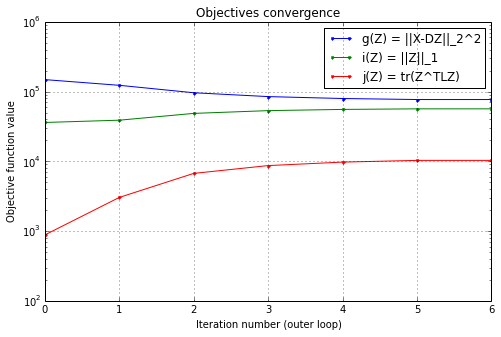

Global objective: 1.436396e+05


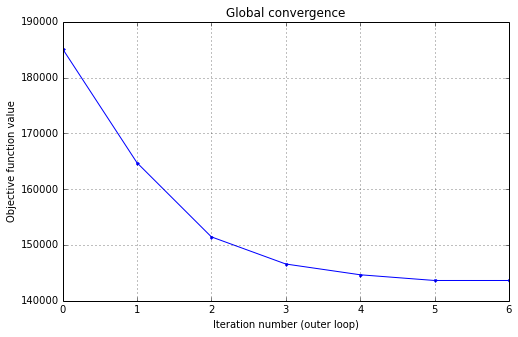

Outer loop: 7 iterations

Z in [-0.109829813242, 0.799122154713]
Sparsity of Z: 3,959,579 non-zero entries out of 19,072,000 entries, i.e. 20.8%.


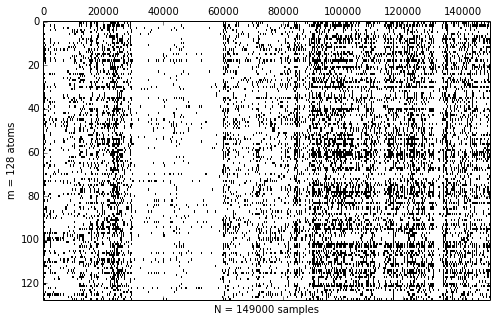

D in [-0.0257097557187, 0.876985788345]
d in [0.999999582767, 1.00000035763]
Constraints on D: True


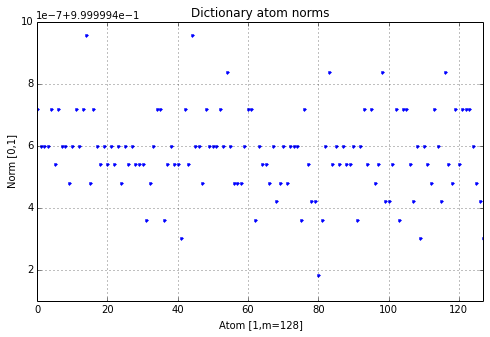

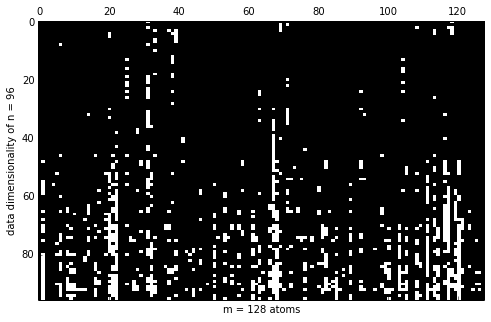

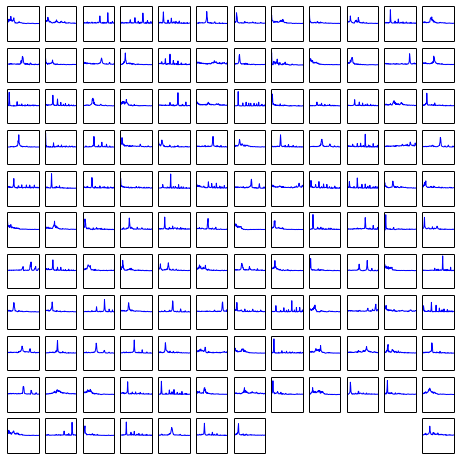

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 2429 seconds

 -------------------- Classification, dm = cosine -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000 x 

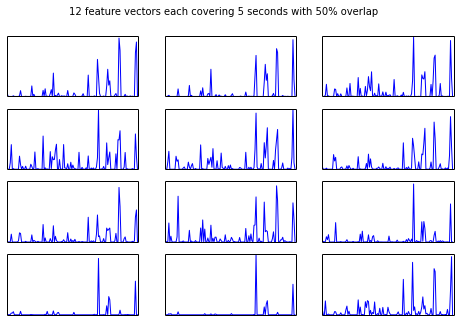

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 76.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 64.6 %
Clips accuracy: 73.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  73 (+/- 6.3) <- [72 80 64 72 74 86 68 66 78 74]
  73 (+/- 7.3) <- [70 74 86 64 82 78 68 68 62 74]
  74 (+/- 5.6) <- [80 82 78 74 74 76 60 74 72 74]
  73 (+/- 6.7) <- [57 80 72 70 64 76 80 74 78 74]
  73 (+/- 5.1) <- [68 78 76 82 70 74 70 64 76 76]
  72 (+/- 4.2) <- [68 78 74 74 74 78 70 70 74 64]
  73 (+/- 7.3) <- [70 82 56 80 70 76 68 78 78 76]
  74 (+/- 5.9) <- [70 66 72 74 86 66 80 76 78 74]
  72 (+/- 7.2) <- [84 64 64 76 78 84 68 68 68 70]
  74 (+/-

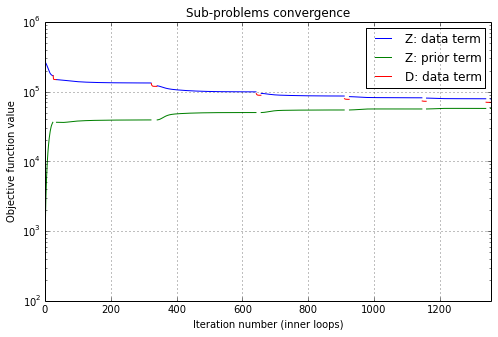

Inner loop: 1357 iterations
g(Z) = ||X-DZ||_2^2 = 6.993616e+04
rdiff: 4.51025160641e-05
i(Z) = ||Z||_1 = 5.727794e+04
j(Z) = tr(Z^TLZ) = 8.521706e+03


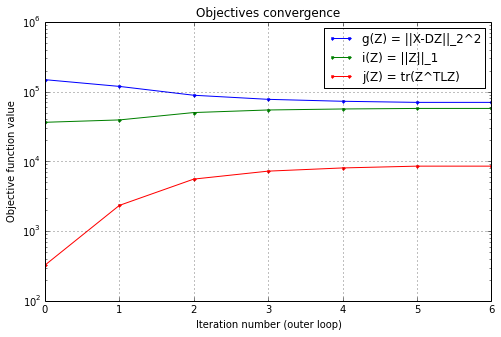

Global objective: 1.357358e+05


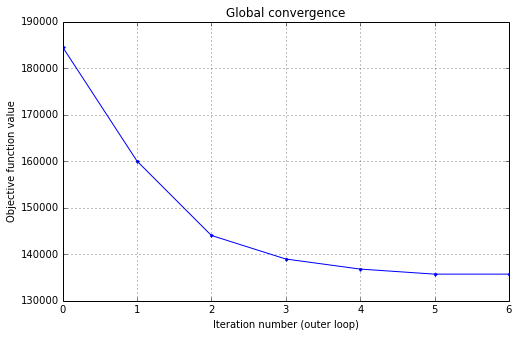

Outer loop: 7 iterations

Z in [-0.193726345897, 1.06732833385]
Sparsity of Z: 3,632,050 non-zero entries out of 19,072,000 entries, i.e. 19.0%.


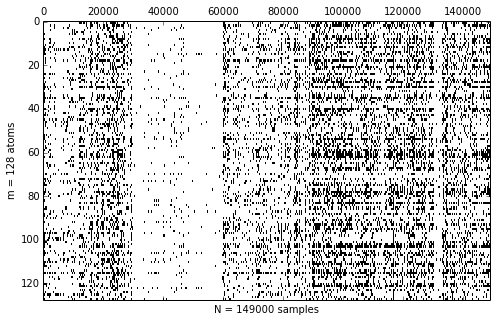

D in [-0.0318740010262, 0.893661141396]
d in [0.999999582767, 1.00000035763]
Constraints on D: True


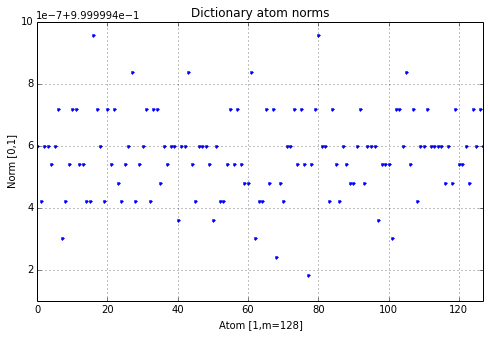

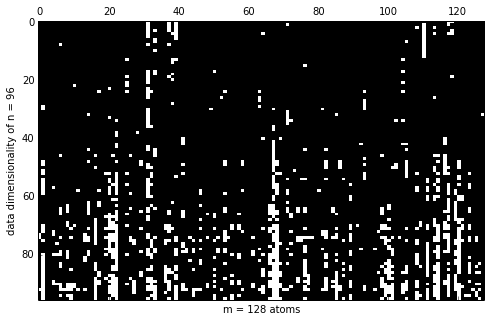

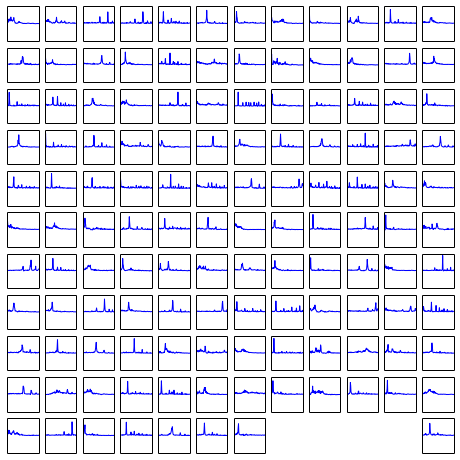

Datasets:
  D : (128, 96)             , float32
  X : (5, 100, 149, 2, 96)  , float32
  Z : (5, 100, 149, 2, 128) , float32
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Overall time: 2877 seconds

 -------------------- Classification, dm = euclidean -------------------- 

Software versions:
  numpy: 1.8.2
  sklearn: 0.14.1
Attributes:
  sr = 22050
  labels = ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Datasets:
  D : (128, 96)               , float32
  X : (5, 100, 149, 2, 96)    , float32
  Z : (5, 100, 149, 2, 128)   , float32
Full dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<class 'h5py._hl.dataset.Dataset'>
Reduced dataset:
  size: N=149,000 x n=128 -> 19,072,000 floats
  dim: 38,144 features per clip
  shape: (5, 100, 149, 2, 128)
<type 'numpy.ndarray'>
Flattened frames:
  size: N=149,000

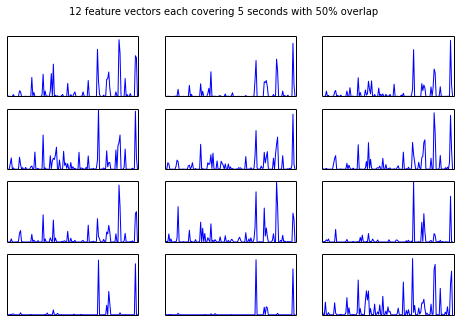

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 128), float64
Testing data: (2400, 128), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 77.0 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1536), float64
Testing data: (200, 1536), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.7 %
Clips accuracy: 70.0 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1536), float64
Labels: (500,), uint8
  71 (+/- 6.1) <- [72 80 68 68 70 84 70 62 72 66]
  71 (+/- 8.0) <- [68 78 78 56 82 78 70 62 66 76]
  72 (+/- 5.4) <- [74 76 82 68 72 72 60 70 74 70]
  70 (+/- 5.8) <- [57 76 64 72 68 68 76 72 78 72]
  71 (+/- 2.7) <- [70 70 76 74 66 74 72 70 70 70]
  72 (+/- 4.6) <- [74 72 76 74 70 68 80 74 70 62]
  68 (+/- 5.9) <- [64 76 56 76 66 72 64 70 72 68]
  70 (+/- 7.8) <- [70 68 62 70 86 57 78 64 76 70]
  70 (+/- 6.8) <- [76 62 74 64 80 80 64 64 72 64]
  69 (+/-

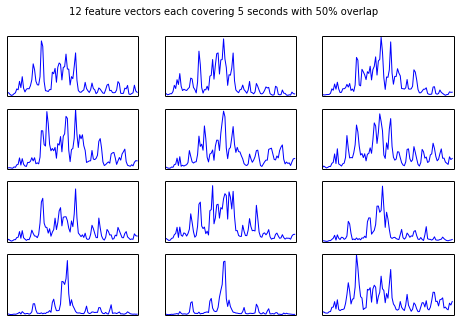

5 genres: blues, classical, country, disco, hiphop
Training data: (3600, 96), float64
Testing data: (2400, 96), float64
Training labels: (3600,), uint8
Testing labels: (2400,), uint8
Accuracy: 68.8 %
5 genres: blues, classical, country, disco, hiphop
Training data: (300, 1152), float64
Testing data: (200, 1152), float64
Training labels: (300,), uint8
Testing labels: (200,), uint8
Feature vectors accuracy: 62.1 %
Clips accuracy: 68.5 %
5 genres: blues, classical, country, disco, hiphop
Data: (500, 1152), float64
Labels: (500,), uint8
  67 (+/- 8.0) <- [72 74 60 48 62 74 72 66 66 74]
  66 (+/- 6.5) <- [70 60 62 52 64 70 72 68 66 76]
  68 (+/- 6.7) <- [74 68 84 62 68 70 62 62 70 62]
  68 (+/- 5.5) <- [60 72 62 66 74 74 72 64 76 64]
  67 (+/- 5.1) <- [57 74 66 70 68 64 72 62 74 64]
  68 (+/- 6.1) <- [68 78 74 64 72 70 68 57 57 66]
  66 (+/- 3.7) <- [62 70 60 68 68 66 60 68 70 68]
  67 (+/- 5.9) <- [68 60 57 68 80 64 64 68 64 72]
  65 (+/- 6.0) <- [68 54 68 66 76 62 68 70 62 57]
  66 (+/- 6

In [5]:
#%run gtzan.ipynb
#%run audio_preprocessing.ipynb
if not regen_graph:
    separator('Graph')
    %run audio_graph.ipynb
if not regen_features:
    separator('Features')
    %run audio_features.ipynb

# Hyper-parameter under test.
for p[Pname] in Pvalues:

    if regen_graph:
        separator('Graph', True)
        %run audio_graph.ipynb
    if regen_features:
        separator('Features', True)
        p['filename_features'] = 'features_{}_{}.hdf5'.format(Pname, p[Pname])
        %run audio_features.ipynb
    separator('Classification', True)
    %run audio_classification.ipynb
    
    # Collect results.
    for key in res:
        res[key].append(globals()[key])

# Baseline, i.e. classification with spectrograms.
p['dataset_classification'] = 'X'
p['scale'] = 'minmax'  # Todo: should be done in pre-processing.
if not regen_graph and not regen_features:
    # Classifier parameters are being tested.
    for p[Pname] in Pvalues:
        separator('Baseline', True)
        %run audio_classification.ipynb
else:
    separator('Baseline')
    %run audio_classification.ipynb
res['baseline'] = len(Pvalues) * [accuracy]
res['baseline_std'] = accuracy_std

## Results

dm = ['cosine', 'euclidean']
res['accuracy_std'] = [6.1280319026584698, 6.3406446833109902]
res['objective_j'] = [10305.532073974609, 8521.7063903808594]
res['objective_i'] = [56504.98046875, 57277.94140625]
res['objective_h'] = [0, 0]
res['objective_g'] = [76829.12109375, 69936.162109375]
res['baseline'] = [67.059999999999974, 67.059999999999974]
res['time_features'] = [2421.2433190345764, 2868.63295006752]
res['baseline_std'] = 6.42778344377
res['sparsity'] = [20.761215394295302, 19.043886325503355]
res['iterations_inner'] = [1143, 1357]
res['iterations_outer'] = [7, 7]
res['accuracy'] = [73.165000000000035, 70.535000000000082]


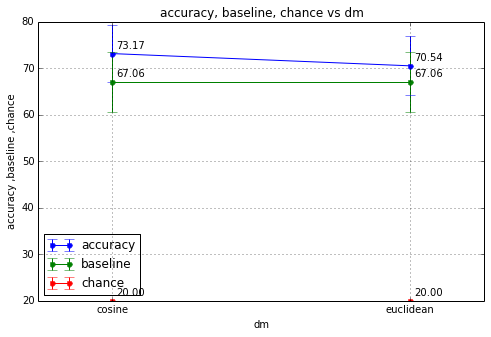

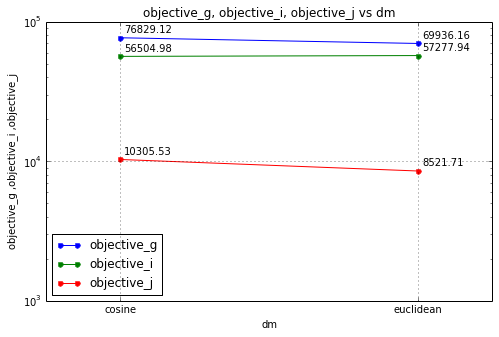

g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)


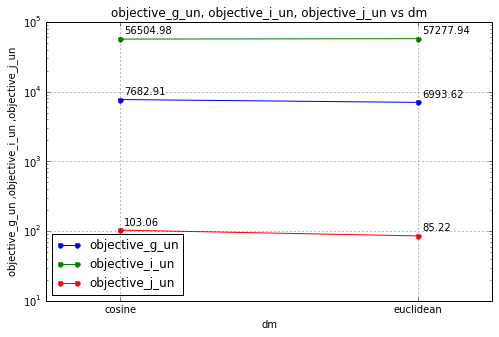

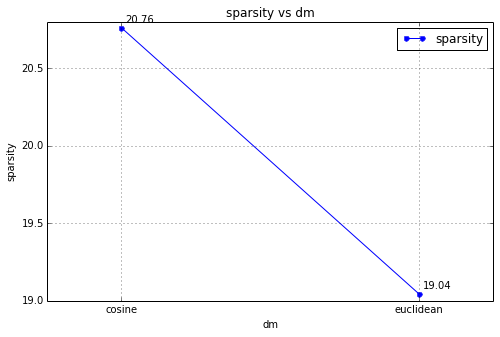

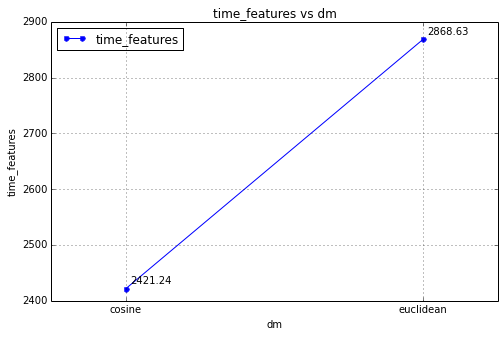

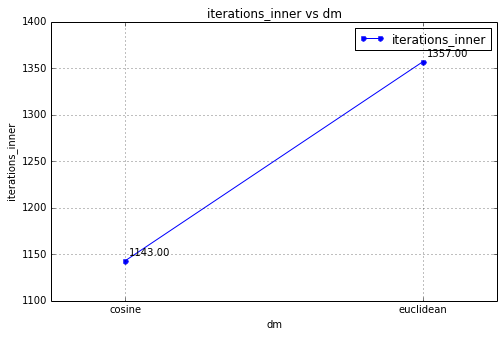

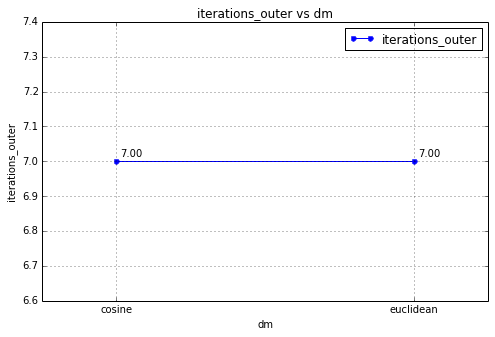

Dictionary atoms for dm = cosine
Dictionary atoms for dm = euclidean
Experiment time: 7804 seconds


/usr/lib/pymodules/python2.7/matplotlib/figure.py:371: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [6]:
print('{} = {}'.format(Pname, Pvalues))
for key, value in res.items():
    if key is not 'atoms':
        print('res[\'{}\'] = {}'.format(key, value))

def plot(*args, **kwargs):
    plt.figure(figsize=(8,5))
    x = range(len(Pvalues))
    log = 'log' in kwargs and kwargs['log'] is True
    pltfunc = plt.semilogy if log else plt.plot
    params = {}
    params['linestyle'] = '-'
    params['marker'] = '.'
    params['markersize'] = 10
    for i, var in enumerate(args):
        if 'err' in kwargs:
            pltfunc = plt.errorbar
            params['yerr'] = res[kwargs['err'][i]]
            params['capsize'] = 5
        pltfunc(x, res[var], label=var, **params)
        for i,j in zip(x, res[var]):
            plt.annotate('{:.2f}'.format(j), xy=(i,j), xytext=(5,5), textcoords='offset points')
    margin = 0.25 / (len(Pvalues)-1)
    params['markersize'] = 10
    plt.xlim(-margin, len(Pvalues)-1+margin)
    plt.title('{} vs {}'.format(', '.join(args), Pname))
    plt.xlabel(Pname)
    plt.ylabel(' ,'.join(args))
    plt.xticks(x, Pvalues)
    plt.grid(True); plt.legend(loc='best'); plt.show()

# Classification results.
res['chance'] = len(Pvalues) * [100./p['Ngenres']]
res['chance_std'] = 0
err=['accuracy_std', 'baseline_std', 'chance_std']
plot('accuracy', 'baseline', 'chance', err=err)

# Features extraction results.
if regen_features:
    plot('objective_g', 'objective_i', 'objective_j', log=True)
    # Unweighted objectives.
    print('g(Z) = ||X-DZ||_2^2, h(Z) = ||Z-EX||_2^2, i(Z) = ||Z||_1, j(Z) = tr(Z^TLZ)')
    div = np.array(Pvalues if Pname is 'ld' else p['ld'])
    res['objective_g_un'] = res['objective_g'] / div
    div = np.array(Pvalues if Pname is 'ls' else p['ls'])
    res['objective_i_un'] = res['objective_i'] / div
    div = np.array(Pvalues if Pname is 'lg' else p['lg'])
    res['objective_j_un'] = res['objective_j'] / div
    plot('objective_g_un', 'objective_i_un', 'objective_j_un', log=True)
    plot('sparsity')
    plot('time_features')
    plot('iterations_inner')
    plot('iterations_outer')

    for i, fig in enumerate(res['atoms']):
        print('Dictionary atoms for {} = {}'.format(Pname, Pvalues[i]))
        fig.show()

print('Experiment time: {:.0f} seconds'.format(time.time() - texperiment))